# 2. Simulate Share Price Path

We first import the necessary libraries needed for this project.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

According to the CEV model, the share price evolves according to the following recursive formula

$S_{t_{i+1}} = S_{t_i} e^{r-\frac{\sigma^2 (t_i,t_{i+1})}{2}(t_{i+1}-t_i)+\sigma(t_i, t_{i+1})\sqrt{t_{i+1}-t_i}Z}$

and the volatility follows the following deterministic formula

$\sigma(t_i,t_{i+1}) = \sigma(S_{ti})^{\gamma-1}$

We can now define the functions to represent the 2 formulas.

In [7]:
def sigma_cev(sigma, S_t, gamma):
    return sigma * S_t ** (gamma - 1)

def getSharePath(S_0, t, dt, r, sigma, gamma, Z):
    if abs(t) <= dt: #as subtraction is not exact
        return [S_0]
    new_Z = norm.rvs(size = 1)[0]
    path = getSharePath(S_0, t - dt, dt, r, sigma, gamma, new_Z)
    S_t_minus_1 = path[-1]
    sigma_t = sigma_cev(sigma, S_t_minus_1, gamma)
    exponent = (r - (sigma_t**2)/2)*dt + sigma_t * np.sqrt(dt) * Z
    S_t = S_t_minus_1 * np.exp(exponent)
    path.append(S_t)
    return path

Basically, a recursive function can be used to represent the recursive formula, with each recursive call looking to get the value of the share price in the previous time node.(i.e. previous month) The base case would be when t=0, for which we would return the initial share price S_0 of 100. 

Since we wish to keep track of the value at each node, we store the result at each stage in an list and return it to the caller for which each caller subsequently adds the value it has calculated to the list. Since the first value returned at the base case is the initial value, each caller will append to the end of the list.

At each stage, we also generate a new standard normal random variable Z to be passed in to the recursive call. Ultimately, this getSharePath function will return a list of size 12 containing the values of the share for each month.

After defining the functions, we can now define the parameters needed. For this exercise, we assume an initial share price of 100 and a risk free rate of 10%.

In [8]:
sigma = 0.3
S_0 = 100
gamma = 0.75
r = 0.1
dt = 1/12
T = 1

We then start simulating the paths for each sample size from 1000 to 50000.

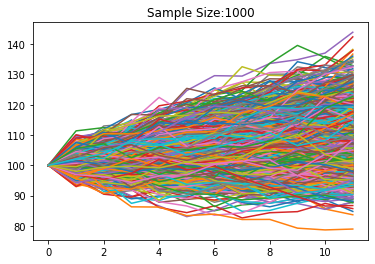

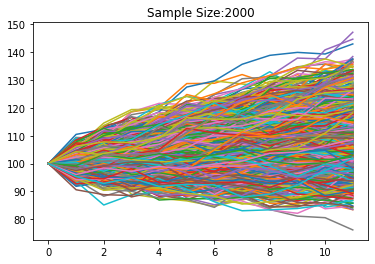

KeyboardInterrupt: 

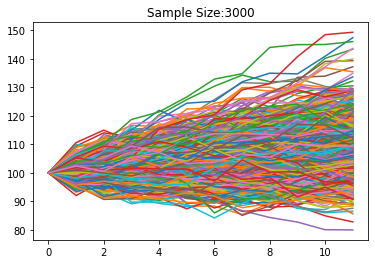

In [10]:
for sampleSize in range(1000, 51000, 1000):
    norm_vector = norm.rvs(size = sampleSize)
    #print("Sample Size: " + str(sampleSize))
    share_path_list = []
    plt.figure()
    plt.title("Sample Size:" + str(sampleSize)) 
    for Z in norm_vector:
        share_path = getSharePath(S_0, T, dt, r, sigma, gamma, Z)
        #print("Share Path " + str(share_path))
        share_path_list.append(share_path)
        plt.plot(share_path)
    plt.show()
    #share_path_list now contains the list of all paths for the given sample size.